In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Clean_Dataset.csv')

### Data Exploration and Analysis

In [3]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
# total count of values per column

df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [7]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [8]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

We can use one hot encoding of above columns as we have less number of different values.

In [9]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [10]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [11]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [13]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [16]:
df.duration.describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

### Data Preprocessing

In [4]:
# Drop `unnamed: 0` and `flight` features
df.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)

In [5]:
# Binary encoding `class` feature, and encode  `stops` feature as 0,1,2 respectively.

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
df['stops'] = df['stops'].apply(lambda x: 0 if x == 'zero' else 1 if x == 'one' else 2)

In [6]:
df.sample(7)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
106119,Air_India,Bangalore,Early_Morning,1,Evening,Kolkata,0,11.42,25,8842
211144,Air_India,Delhi,Evening,1,Night,Mumbai,1,6.67,42,41113
166525,Vistara,Hyderabad,Afternoon,1,Night,Bangalore,0,9.92,12,11319
103656,Indigo,Bangalore,Morning,1,Night,Kolkata,0,10.67,9,9273
8783,Indigo,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.42,44,2410
82966,Vistara,Mumbai,Afternoon,2,Night,Chennai,0,8.08,41,8320
168236,Indigo,Hyderabad,Evening,1,Night,Bangalore,0,4.42,28,3072


In [7]:
# one Hot encoding
df = df.join(pd.get_dummies(df['airline'] ,prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df['source_city'] ,prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df['departure_time'] ,prefix='departure')).drop('departure_time', axis=1)
df = df.join(pd.get_dummies(df['arrival_time'] ,prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df['destination_city'] ,prefix='destination')).drop('destination_city', axis=1)


In [8]:
df.sample(7)

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
290598,1,1,6.92,6,61873,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
184535,1,0,33.92,30,7161,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
188596,1,0,9.58,11,8980,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
159976,1,0,21.17,13,7774,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
177597,1,0,12.42,18,4359,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
299378,1,1,12.17,33,51457,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
249168,1,1,11.17,8,54684,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [9]:
df = df.astype(int)

In [10]:
df.sample(7)

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
190432,1,0,6,24,5092,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
115926,1,0,10,6,14524,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
34079,0,0,2,41,3013,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
181756,1,0,23,12,14114,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
105832,1,0,11,24,3393,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
29683,1,0,15,9,13935,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
193824,1,0,28,49,5320,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Model Training

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('price', axis=1), df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
rg = RandomForestRegressor(n_jobs=-1)

rg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [37]:
#evaluate
rg.score(X_test, y_test)

0.9762211709183816

In [41]:
# import some matrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y_pred = rg.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9762211709183816
MAE: 1478.0736334879218
MSE: 12255869.282747213
RMSE: 3500.838368555054


Text(0.5, 1.0, 'Actual vs Predicted Price')

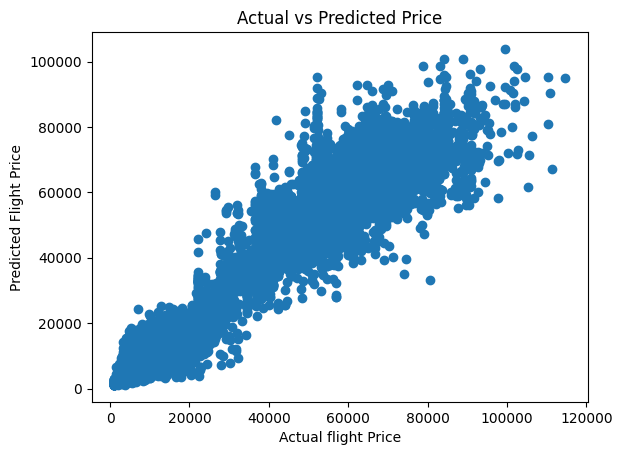

In [42]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual flight Price')
plt.ylabel("Predicted Flight Price")
plt.title("Actual vs Predicted Price")

we can see the points are scatter, but are tight lined, not spreaded very much, its mean the variance is not too much

In [46]:
## Feature importances

importances = dict(zip(rg.feature_names_in_, rg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8819630151515631),
 ('duration', 0.05129305747130151),
 ('days_left', 0.020831027447180087),
 ('airline_Vistara', 0.0049717162422387665),
 ('airline_Air_India', 0.004969919005044203),
 ('source_Delhi', 0.0041076180924066895),
 ('destination_Delhi', 0.003605901890044775),
 ('source_Mumbai', 0.0022656255757138757),
 ('destination_Mumbai', 0.0020346978819132974),
 ('source_Kolkata', 0.001810634991604497),
 ('destination_Kolkata', 0.0017743916030698063),
 ('stops', 0.001709381793666562),
 ('destination_Hyderabad', 0.0016450972820217938),
 ('arrival_Evening', 0.0016049575683078632),
 ('destination_Bangalore', 0.0012940560401690096),
 ('arrival_Night', 0.0012830852186200728),
 ('source_Bangalore', 0.0012684551757277316),
 ('source_Hyderabad', 0.001253802518528656),
 ('departure_Evening', 0.0012182122321506604),
 ('departure_Morning', 0.001041888303818014),
 ('arrival_Afternoon', 0.0010255976165921483),
 ('source_Chennai', 0.0009658576483383336),
 ('destination_Chennai', 0.000903

<BarContainer object of 7 artists>

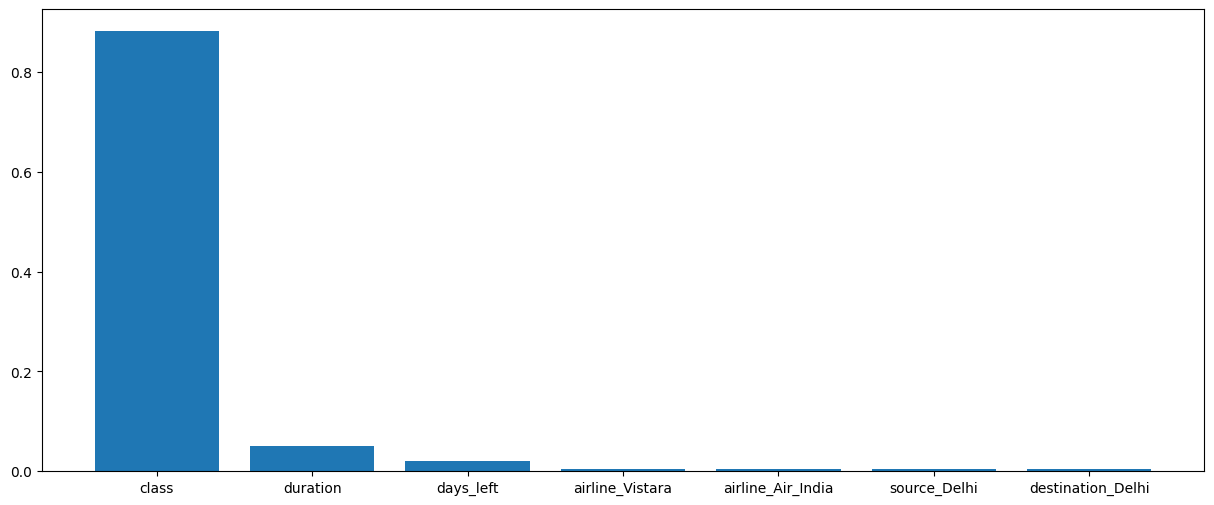

In [49]:
plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importances][:7], [x[1] for x in sorted_importances[:7]])

In [50]:
## Hyper-parameter tuning

### Method 1

it will take very long to train, and highly computational

In [57]:
# reg = RandomForestRegressor(n_jobs=-1)

In [59]:
# # method 1
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100,200,300,400,500],
#     'max_depth': [None, 10,20,30],
#     'min_samples_split': [2,5,10],
#     'min_samples_leaf': [1,2,4],
#     'max_features': ['auto', 'sqrt']
# }

# # combinations: 5x4x3x3x2 = 360 combinations --> it will take long time.
# grid_search = GridSearchCV(reg, param_grid, cv=5, verbose=2, n_jobs=-1, )
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END max_depth=None,

### Method 2: 

In this case it will not check of all combination, it will just select random.

In [52]:
# Method 2: in this case it will not check of all combination, it will just select random.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100,500),
    'max_depth': [None ,10,20,30,40,50],
    'min_samples_split': randint(1,10),
    'min_samples_leaf': randint(1,5),
    'max_features': [1.0,'auto', 'sqrt'],
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=3, cv=3, scoring='neg_mean_squared_error', verbose=2, 
                                   random_state=42, n_jobs=-1)

random_search.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=199; total time=  46.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=199; total time=  48.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=199; total time=  49.5s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=314; total time= 1.1min
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=314; total time= 1.1min
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=314; total time= 1.2min
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=3, min_samples_split=8, n_estimators=288; total time= 1.4min
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=3, min_samples_split=8, n_estimators=288; to

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [1.0, 'auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782f057df380>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782eff5b60f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782f119ba5a0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [53]:
best_regressor = random_search.best_estimator_

In [54]:
best_regressor.score(X_test, y_test)

0.9804783568573654

In [55]:
# import some matrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y_pred = best_regressor.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9804783568573654
MAE: 1424.608776910383
MSE: 10061668.962729437
RMSE: 3172.0133925835553


Text(0.5, 1.0, 'Actual vs Predicted Price')

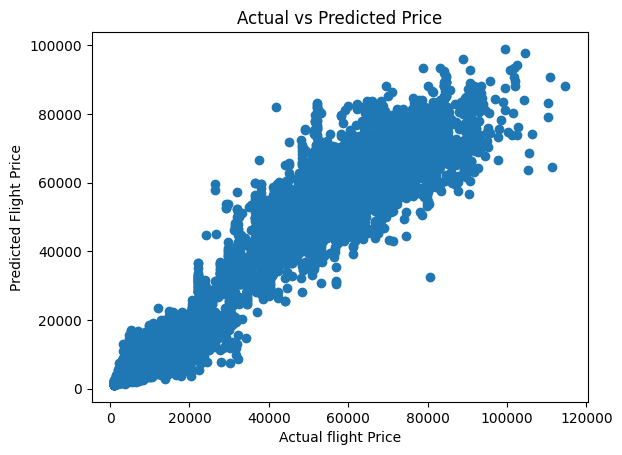

In [56]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual flight Price')
plt.ylabel("Predicted Flight Price")
plt.title("Actual vs Predicted Price")

**<center>*****END*****</center>**